In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
from datetime import datetime

np.random.seed(0)           # Seed for NumPy random number generator
tf.random.set_seed(0)       # Seed for TensorFlow random number generator

mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

n_epochs = 1   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 20000    # Size of the train dataset
n_test = 10000     # Size of the test dataset
n_batches = 1     # Size of the batches





2024-05-14 14:28:41.694498: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-14 14:28:41.694541: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-14 14:28:41.695476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-14 14:28:41.701343: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 14:28:42.432099: W tensorflow/comp

In [3]:
# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis], requires_grad=False)
test_images = np.array(test_images[..., tf.newaxis], requires_grad=False)


n_qubits = 4
dev = qml.device("default.qubit.tf", wires=n_qubits)


@qml.qnode(dev, interface='tf')
def qnotnode(inputs):
    inputs *= np.pi
    qml.AngleEmbedding(inputs, wires=range(n_qubits), rotation='Y')
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[0, 3])
    return [qml.expval(qml.PauliZ(j)) for j in range(n_qubits)]

2024-05-14 14:28:43.593323: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 692 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:b3:00.0, compute capability: 7.5


In [4]:


process_square_2x2 = lambda square_2x2 : qnotnode(square_2x2)

process_subsections = lambda squares: tf.vectorized_map(process_square_2x2,squares)

list_squares_2x2 = lambda image_subsections: tf.reshape(tf.unstack(image_subsections, axis = 1), [196,4])

get_subsections_14x14 = lambda im : tf.reshape(tf.unstack(tf.reshape(im,[14,2,14,2]), axis = 2),[14,14,4])

separate_channels = lambda channel_stack: tf.reshape(channel_stack, [14,14,4])

preprocessing = lambda input: tf.vectorized_map(
    lambda image:(separate_channels(tf.transpose(process_subsections(list_squares_2x2(get_subsections_14x14(image)))))),
    input
)

In [5]:
#preprocessed = preprocessing(train_images[:n_train])

In [10]:
get_subsections_14x14(np.arange(784).reshape(28,28))

<tf.Tensor: shape=(14, 14, 4), dtype=int64, numpy=
array([[[  0,   1,  28,  29],
        [ 56,  57,  84,  85],
        [112, 113, 140, 141],
        [168, 169, 196, 197],
        [224, 225, 252, 253],
        [280, 281, 308, 309],
        [336, 337, 364, 365],
        [392, 393, 420, 421],
        [448, 449, 476, 477],
        [504, 505, 532, 533],
        [560, 561, 588, 589],
        [616, 617, 644, 645],
        [672, 673, 700, 701],
        [728, 729, 756, 757]],

       [[  2,   3,  30,  31],
        [ 58,  59,  86,  87],
        [114, 115, 142, 143],
        [170, 171, 198, 199],
        [226, 227, 254, 255],
        [282, 283, 310, 311],
        [338, 339, 366, 367],
        [394, 395, 422, 423],
        [450, 451, 478, 479],
        [506, 507, 534, 535],
        [562, 563, 590, 591],
        [618, 619, 646, 647],
        [674, 675, 702, 703],
        [730, 731, 758, 759]],

       [[  4,   5,  32,  33],
        [ 60,  61,  88,  89],
        [116, 117, 144, 145],
        [172, 1

In [8]:
list_squares_2x2(get_subsections_14x14(np.arange(784).reshape(28,28)))

<tf.Tensor: shape=(196, 4), dtype=int64, numpy=
array([[  0,   1,  28,  29],
       [  2,   3,  30,  31],
       [  4,   5,  32,  33],
       [  6,   7,  34,  35],
       [  8,   9,  36,  37],
       [ 10,  11,  38,  39],
       [ 12,  13,  40,  41],
       [ 14,  15,  42,  43],
       [ 16,  17,  44,  45],
       [ 18,  19,  46,  47],
       [ 20,  21,  48,  49],
       [ 22,  23,  50,  51],
       [ 24,  25,  52,  53],
       [ 26,  27,  54,  55],
       [ 56,  57,  84,  85],
       [ 58,  59,  86,  87],
       [ 60,  61,  88,  89],
       [ 62,  63,  90,  91],
       [ 64,  65,  92,  93],
       [ 66,  67,  94,  95],
       [ 68,  69,  96,  97],
       [ 70,  71,  98,  99],
       [ 72,  73, 100, 101],
       [ 74,  75, 102, 103],
       [ 76,  77, 104, 105],
       [ 78,  79, 106, 107],
       [ 80,  81, 108, 109],
       [ 82,  83, 110, 111],
       [112, 113, 140, 141],
       [114, 115, 142, 143],
       [116, 117, 144, 145],
       [118, 119, 146, 147],
       [120, 121, 148, 1

In [ ]:
with tf.device("/cpu:0"):
  preprocessed_cpu_1 = tf.identity(preprocessed)

preprocessed = preprocessing(train_images[n_train:n_train*2])

with tf.device("/cpu:0"):
  preprocessed_cpu_2 = tf.identity(preprocessed)

preprocessed = preprocessing(train_images[n_train*2:n_train*3])

with tf.device("/cpu:0"):
  preprocessed_training_cpu = tf.reshape(tf.stack([preprocessed_cpu_1,preprocessed_cpu_2,tf.identity(preprocessed)]),[n_train*3,14,14,4])

train_labels = train_labels[:n_train*3]

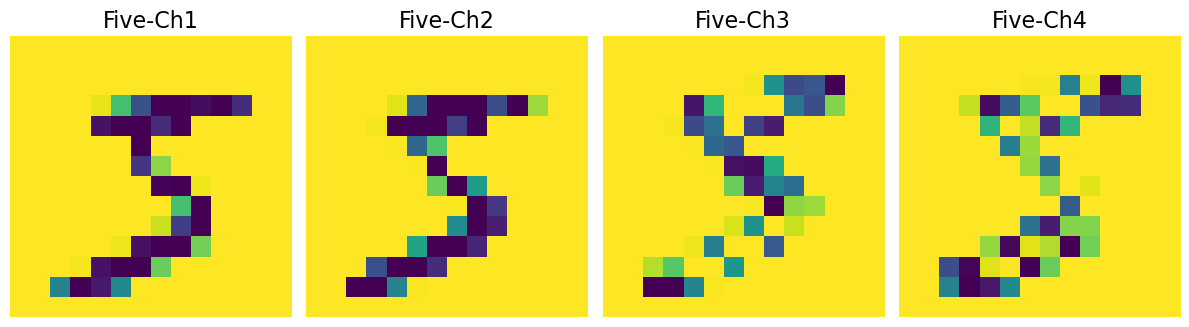

In [ ]:
image_titles = ['Five-Ch1', 'Five-Ch2', 'Five-Ch3','Five-Ch4']
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(preprocessed_training_cpu[0][:,:,i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()